In [21]:
%load_ext autoreload
%autoreload 2

import os, sys
import pandas as pd
import numpy as np
import glob

import pylab as plt
from matplotlib.pyplot import get_cmap
%matplotlib inline  

src_dir = os.path.abspath(os.path.join(os.pardir,'src'))
sys.path[0] = src_dir

from analysis.factor_analysis import rotated_scaled_fa

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load the person-dimension data

In [2]:
Q = 300 #

# number of components
n_comp = 5

# Read the Scoring Key

We generate a dataframe showing the relation between each question and domain

In [10]:
list_doms = ['N','E','O','A','C']

path_read = os.path.join(os.pardir,'data_filter')
fname_read = 'IPIP%d_questions_domains.txt'%(Q)
filename = os.path.join(path_read,fname_read)
with open(filename,'r') as f:
    x = f.readlines()
list_q = [h.split()[0] for h in x]
list_d = [h.split()[1] for h in x]

df_qd = pd.DataFrame(index=list_q,columns=list_doms)
for i_q,q in enumerate(list_q):
    d = list_d[i_q]
    df_qd.loc[q,d]=1

In [11]:
list_q

['Q_1',
 'Q_2',
 'Q_3',
 'Q_4',
 'Q_5',
 'Q_6',
 'Q_7',
 'Q_8',
 'Q_9',
 'Q_10',
 'Q_11',
 'Q_12',
 'Q_13',
 'Q_14',
 'Q_15',
 'Q_16',
 'Q_17',
 'Q_18',
 'Q_19',
 'Q_20',
 'Q_21',
 'Q_22',
 'Q_23',
 'Q_24',
 'Q_25',
 'Q_26',
 'Q_27',
 'Q_28',
 'Q_29',
 'Q_30',
 'Q_31',
 'Q_32',
 'Q_33',
 'Q_34',
 'Q_35',
 'Q_36',
 'Q_37',
 'Q_38',
 'Q_39',
 'Q_40',
 'Q_41',
 'Q_42',
 'Q_43',
 'Q_44',
 'Q_45',
 'Q_46',
 'Q_47',
 'Q_48',
 'Q_49',
 'Q_50',
 'Q_51',
 'Q_52',
 'Q_53',
 'Q_54',
 'Q_55',
 'Q_56',
 'Q_57',
 'Q_58',
 'Q_59',
 'Q_60',
 'Q_61',
 'Q_62',
 'Q_63',
 'Q_64',
 'Q_65',
 'Q_66',
 'Q_67',
 'Q_68',
 'Q_69',
 'Q_70',
 'Q_71',
 'Q_72',
 'Q_73',
 'Q_74',
 'Q_75',
 'Q_76',
 'Q_77',
 'Q_78',
 'Q_79',
 'Q_80',
 'Q_81',
 'Q_82',
 'Q_83',
 'Q_84',
 'Q_85',
 'Q_86',
 'Q_87',
 'Q_88',
 'Q_89',
 'Q_90',
 'Q_91',
 'Q_92',
 'Q_93',
 'Q_94',
 'Q_95',
 'Q_96',
 'Q_97',
 'Q_98',
 'Q_99',
 'Q_100',
 'Q_101',
 'Q_102',
 'Q_103',
 'Q_104',
 'Q_105',
 'Q_106',
 'Q_107',
 'Q_108',
 'Q_109',
 'Q_110',
 'Q_111'

In [12]:
# df_qd

# Read the Responses

We load responses of all respondents.

We remove the ones in which there is at least one missing repsonse (dropna)


In [13]:
path_read = os.path.join(os.pardir,'data_filter')
fname_read = 'df_filter_IPIP%d.csv'%(Q)
filename = os.path.join(path_read,fname_read)
df_pq = pd.read_csv(filename,usecols=list_q).dropna(how='any',axis=0)
## r

In [15]:
# df_pq

# Factor analysis

We perform factor analysis using the varimax rotation

In [18]:
marker_varimax = True ## whether to do varimax rotation or not
arr_x = np.array(df_pq) ## transofrm dataframe into a numpy array
result_fa = rotated_scaled_fa(n_comp, arr_x,varimax_=marker_varimax)

## factor loadings
arr_qd = result_fa[0] ## questbion-dimension-data
## factor scores
arr_pd = result_fa[1] ## person-dimension-data

# Organize the factor-loadings

We order questions from the same domain, affecting the factor loading matrix

We order the factors such that they will correspond to NEOAC affecting both the factor loading and the factor score matrix.

In [25]:
## sort the questions
ind_sort = []
for d in list_doms:
    inds_tmp = list(np.where( np.abs(np.array(df_qd[d]))==1. )[0])
    np.random.shuffle(inds_tmp)
    ind_sort += inds_tmp
    
## sort the factors
arr_qd_sort = 0.0*arr_qd
arr_pd_sort = 0.0*arr_pd

for i_d,d in enumerate(list_doms):
    ## select only the questions related to domain
    inds_d = list(np.where( np.abs(np.array(df_qd[d]))==1. )[0])
    arr_qd_d = arr_qd[inds_d,:]
    H = np.mean(arr_qd_d,axis=0)
    indmax_d = np.argmax(np.abs(H))
    sign_d = np.sign(H[indmax_d])
    arr_qd_sort[:,i_d]=sign_d*arr_qd[:,indmax_d]
    arr_pd_sort[:,i_d] = sign_d*arr_pd[:,indmax_d]    
    
arr_qd = 1.0*arr_qd_sort
arr_pd = 1.0*arr_pd_sort

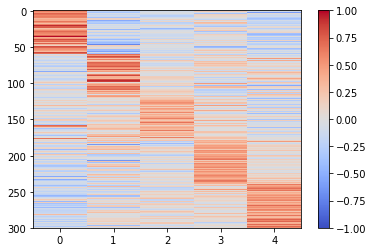

In [26]:
## plotting the factor loadings
cm=get_cmap('coolwarm')
plt.imshow(arr_qd[ind_sort],aspect='auto',vmin=-1,vmax=1,cmap=cm)
plt.colorbar()

# Save the result

we save the result as npy-arrays

In [27]:
arr_qd_neoac = arr_qd[ind_sort]

# ## save the scores of questions (loadings)
path_save = os.path.join(src_dir,os.pardir,'data_filter')
fname_save = 'ipip%s-no0_arr_qd_neoac_score-1.npy'%(Q)
filename_save = os.path.join(path_save,fname_save)
np.save(filename_save,arr_qd_neoac)

In [28]:
arr_pd_neoac = 1.0*arr_pd
path_save = os.path.join(src_dir,os.pardir,'data_filter')
fname_save = 'ipip%s-no0_arr_pd_neoac_score-1.npy'%(Q)
filename_save = os.path.join(path_save,fname_save)
np.save(filename_save,arr_pd_neoac)